In [ ]:
!pip install xlrd

In [ ]:
!pip install pandas

In [ ]:
import pandas 
print(pandas.__version__) 

1.3.5


In [ ]:
!pip install openpyxl

In [ ]:
!pip install --upgrade --force-reinstall xlrd

  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


In [ ]:
import pandas
import xlrd
X = pandas.read_excel("/content/cars.xlsx",sheet_name=0,header=0,index_col=0).fillna(value=0)

dimension

In [ ]:
print(X.shape)

(18, 6)


affichage les données

In [ ]:
print(X)

                  CYL  PUISS  LONG  LARG  POIDS  V.MAX
Modele                                                
Alfasud TI       1350     79   393   161    870    165
Audi 100         1588     85   468   177   1110    160
Simca 1300       1294     68   424   168   1050    152
Citroen GS Club  1222     59   412   161    930    151
Fiat 132         1585     98   439   164   1105    165
Lancia Beta      1297     82   429   169   1080    160
Peugeot 504      1796     79   449   169   1160    154
Renault 16 TL    1565     55   424   163   1010    140
Renault 30       2664    128   452   173   1320    180
Toyota Corolla   1166     55   399   157    815    140
Alfetta 1.66     1570    109   428   162   1060    175
Princess 1800    1798     82   445   172   1160    158
Datsun 200L      1998    115   469   169   1370    160
Taunus 2000      1993     98   438   170   1080    167
Rancho           1442     80   431   166   1129    144
Mazda 9295       1769     83   440   165   1095    165
Opel Rekor

**Préparation des données**

centrer et réduire les variables

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)

[[-0.77509889 -0.28335818 -1.88508077 -1.09734528 -1.56900676  0.56976043]
 [-0.12016326  0.01963869  1.60580955  2.0010414   0.23416142  0.14597168]
 [-0.92920139 -0.83885242 -0.44217944  0.25819889 -0.21663062 -0.53209032]
 [-1.12733318 -1.29334771 -1.00072189 -1.09734528 -1.11821472 -0.61684807]
 [-0.12841875  0.67613189  0.25599862 -0.51639778  0.19659542  0.56976043]
 [-0.9209459  -0.13185975 -0.20945342  0.45184806  0.0087654   0.14597168]
 [ 0.45221746 -0.28335818  0.72145067  0.45184806  0.60982146 -0.36257482]
 [-0.18345536 -1.49534562 -0.44217944 -0.71004695 -0.51715865 -1.54918332]
 [ 2.84080623  2.19111619  0.86108628  1.22644473  1.81193359  1.84112668]
 [-1.28143568 -1.49534562 -1.60580955 -1.87194195 -1.98223281 -1.54918332]
 [-0.16969621  1.23162613 -0.25599862 -0.90369611 -0.14149861  1.41733793]
 [ 0.45772112 -0.13185975  0.53526985  1.03279556  0.60982146 -0.02354382]
 [ 1.0080872   1.53462299  1.65235475  0.45184806  2.18759363  0.14597168]
 [ 0.99432805  0.67613189

moyenne

In [ ]:
import numpy

print(numpy.mean(Z,axis=0))

[-2.22044605e-16 -1.41861831e-16  0.00000000e+00  1.86270752e-15
  5.73615229e-16  5.55111512e-16]


écart-type

In [ ]:
print(numpy.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1.]


**Analyse en composantes principales**

In [ ]:
from sklearn.decomposition import PCA

acp = PCA(svd_solver='full')

affichage des paramètres

Le paramètre svd_solver = ‘full’ indique l’algorithme utilisé pour la décomposition en valeurs singulières.

In [ ]:
print(acp)

PCA(svd_solver='full')


La fonction fit_transform() renvoie en sortie les coordonnées factorielles Fik 

In [ ]:
coord = acp.fit_transform(Z)

obtenir les variances (valeurs propres, λk) associées aux axes factoriels

In [ ]:
print(acp.explained_variance_)

[4.68090853 0.90641889 0.39501114 0.22650574 0.09826011 0.04583676]


nombre d'observations

In [ ]:
n = X.shape[0]

nombre de variables

In [ ]:
m = X.shape[1]

attention pas les meme valeurs

In [ ]:
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


les valeurs singulières

In [ ]:
print(acp.singular_values_**2/n)

[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


In [ ]:
print(acp.explained_variance_ratio_)

[0.73680968 0.14267705 0.06217768 0.03565368 0.01546687 0.00721505]


La première composante accapare 73.68% de l’information disponible. Il y a un fort ‘’effet taille’’ dans nos données. Nous disposons de 87.94% avec les deux premiers facteurs. Les suivants semblent anecdotiques.

**Détermination du nombre de facteur à retenir**

test des bâtons brisés

𝑏𝑘 = ∑ 1/m        
m de k à p

In [ ]:
bs = 1/numpy.arange(m,0,-1)
bs = numpy.cumsum(bs)
bs = bs[::-1]
print(pandas.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    4.420858  2.450000
1    0.856062  1.450000
2    0.373066  0.950000
3    0.213922  0.616667
4    0.092801  0.366667
5    0.043290  0.166667


**Représentation des individus**

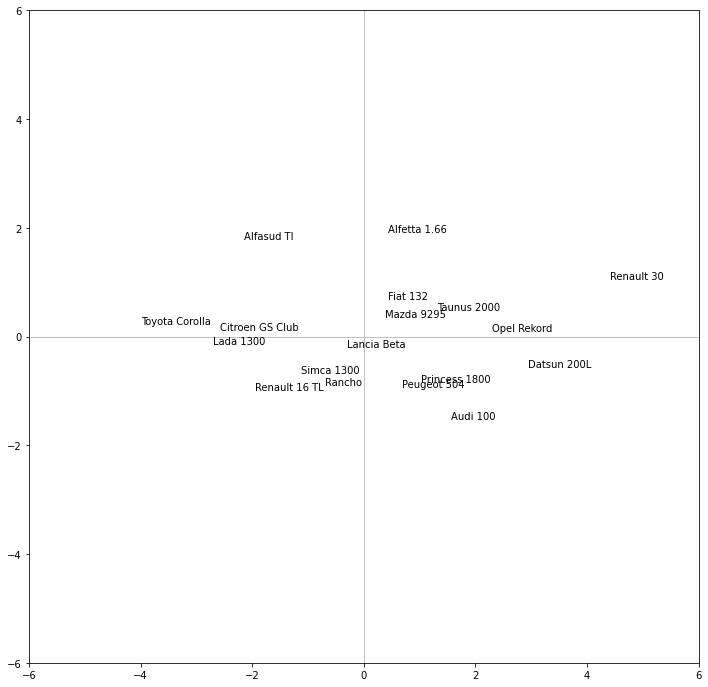

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(12,12))

axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

for i in range(n):
  plt.annotate(X.index[i],(coord[i,0],coord[i,1]))

plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

plt.show()

**Représentation des variables**

 vecteurs propres pour l’analyse des variables

In [ ]:
print(acp.components_)

[[ 0.42493602  0.42179441  0.42145993  0.38692224  0.43051198  0.35894427]
 [ 0.12419108  0.41577389 -0.41181773 -0.446087   -0.24267581  0.6198626 ]
 [-0.35361252 -0.18492049  0.06763394  0.60486812 -0.48439601  0.48547226]
 [ 0.80778648 -0.35779199 -0.27975231  0.21156941 -0.30171136 -0.0735743 ]
 [ 0.15158003 -0.29373465  0.73056903 -0.47819008 -0.30455842  0.18865511]
 [-0.05889517 -0.63303302 -0.19029153 -0.10956624  0.5808122   0.45852167]]


les facteurs sont en ligne, les variables en colonne

racine carrée des valeurs propres

In [ ]:
import numpy
sqrt_eigval = numpy.sqrt(eigval)

corvar : matrice des corrélations variables avec les axes

In [ ]:
corvar = numpy.zeros((m,m))
for k in range(m):
  corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

print(corvar)

[[ 0.89346354  0.1149061  -0.21598347  0.37361508  0.04617627 -0.01225391]
 [ 0.88685803  0.38468911 -0.11294784 -0.16548492 -0.08948124 -0.13171084]
 [ 0.88615477 -0.38102873  0.04131023 -0.12939024  0.22255537 -0.03959265]
 [ 0.81353638 -0.4127359   0.36944822  0.09785447 -0.14567244 -0.0227967 ]
 [ 0.90518746 -0.22453248 -0.29586489 -0.13954667 -0.09277852  0.12084561]
 [ 0.75471037  0.57351941  0.29652226 -0.03402937  0.05747056  0.09540146]]


In [ ]:
print(pandas.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

      id     COR_1     COR_2
0    CYL  0.893464  0.114906
1  PUISS  0.886858  0.384689
2   LONG  0.886155 -0.381029
3   LARG  0.813536 -0.412736
4  POIDS  0.905187 -0.224532
5  V.MAX  0.754710  0.573519


cercle des corrélations

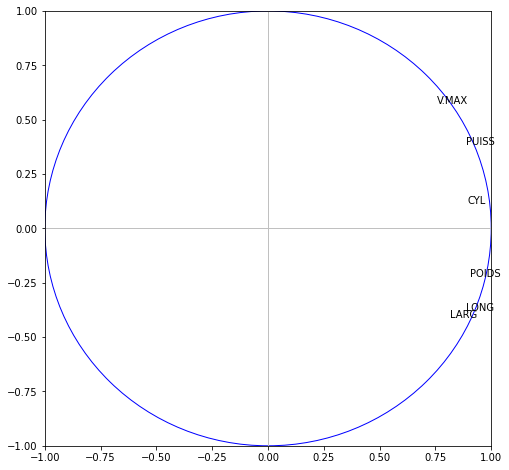

In [ ]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(m):
  plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.show()